# Bell's inequality

Let's take a step back, and look at the principles we have learned so far: How can entanglement even be possible? How can a measurement of one particle's spin affects another, even if they are far away from each other? Is it because measurement of the two spins are predetermined - are we missing some hidden information quantumm mechanics can't give us? Let's complete the QM1 course by investigating the completion of quantum mechanics!

In this exercise we will perform a famous Bell experiment consisting of two entanglet spin $1/2$ particles. The results tells us whether quantum mechanics is a incomplete theory or not. 

**Learning goal:** to understand better the foundation of quantum mechanics and entanglement. 

**Exercise 1/your prediction:** what are the possible outcomes when we measure the $z$-component of spin on a single spin 1/2 particle in $\frac{1}{\sqrt{2}}(|\uparrow \rangle - |\downarrow \rangle)$? We will denote the outcomes in units of $\hbar/2$. 


**Some background:** In 1964, John Stewart Bell proposed the famous <b>Bell's inequality</b>, showing that any theory of hidden variables is incompatible with quantum mechanics. Before we get started, let's look at the setup.

We consider spin-0 particle decaying into two spin-½ particles in the state.

\begin{equation}
|\psi_-\rangle = \frac{1}{\sqrt{2}}\big(|\uparrow\downarrow\rangle-| \downarrow\uparrow\rangle\big) \ .
\end{equation}


Then we measure the spin of each particle along each axis (it could be the z-axis $(S_z)$ and x-axis $(S_x)$, perhaps a combination). Lets call the axis for the spin measurement of particle 1 for $\mathbf{a}$ and the axis the spin measurement of particle 2 for $\mathbf{b}$.

We repeat the experiment multiple times and dub the **average product of the measurements** $P(\mathbf{a},\mathbf{b})$. Then we change the orientation of the measurement devices and repeats this experiment with axies $\mathbf{a}$ and $\mathbf{c}$, as well as $\mathbf{b}$ and $\mathbf{c}$. Bell proved exclusively from statistics that any hidden variable theory should produce the inequality

$$|P(\mathbf{a},\mathbf{b})-P(\mathbf{a},\mathbf{c})| \leq 1 + P (\mathbf{b},\mathbf{c})$$

**Exercise 2:** what does it imply if the inequality is violated in experiments? What if it is not violated? 

This is <b>Bell's inequality</b>. In this excersize we will make such experiments, and verify using an *actual* quantum computer that this result is voilated by real life quantum mechanics!

**Confused?** Chapter 12 gives a more elaborated explanation. 

We start by importing the necessary packages for these experiments.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble

from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-01-14 13:58:56,480: Credentials are already in use. The existing account in the session will be replaced.


**Setup:** We now make a small simplification: We choose $\mathbf{a}$, $\mathbf{b}$ and $\mathbf{c}$ to all be in the same plane - defining them from their angle with the $z$-axis. We let $\mathbf{a}=\mathbf{z}$ be fixed, since we are just interested in the relative angles between the different measurement devices. This means that $\theta_A = 0$. 

Feel free to fiddle with these angles yourself, but be beware that **not all combinations of vectors violate Bell's inequality**. Below we define the angles of the vectors $\mathbf{a}$, $\mathbf{b}$ and $\mathbf{c}$.

**Exercise 3:** Verify that choosing $\mathbf{b} = \mathbf{c}$ will uphold Bell's inequality. 

In [12]:
thetaA = 0.0
thetaB = np.pi/2
thetaC = np.pi/4

We now set up the circuit for measuring $P(\mathbf{a},\mathbf{b})$.

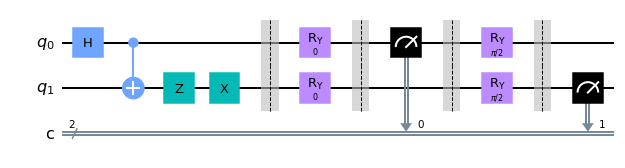

In [13]:
circAB = QuantumCircuit(2,2)
circAB.h(0)
circAB.cx(0,1)
circAB.z(1)
circAB.x(1)
circAB.barrier()
theta1 = thetaA
circAB.ry(theta1,0)
circAB.ry(theta1,1)
circAB.barrier() # just a vertical line which seperates where we set up the state and where we measure. 
circAB.measure(0,0)
circAB.barrier() 
theta2 = thetaB-thetaA 
circAB.ry(theta2,0)
circAB.ry(theta2,1)
circAB.barrier() 
circAB.measure(1,1)
circAB.draw()

The code below sends this circuit to an actual IBM-Q Quantum Computer, and runs it 1024 times - there might be others using the computers, so it might take a while! The variable 'sim' can be togled True or False if you want to simulate this experiment or actually run it - It may take some time to get acces to the quantum computer, so feel free to use simulations if it takes too long.

**Don't miss:**  We rotate both $q_0$ and $q_1$ and not just one of them?

In [14]:
sim = True #Set this to False if you want to run on an actual quantum computer

In [15]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = 1024
    resultAB = simulator.run(circAB, shots=Nmeasure).result()
    device_countsAB = resultAB.get_counts()
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circAB, backend, optimization_level=3)
    qobj = assemble(transpiled_circ, shots=shots)
    jobAB = backend.run(qobj)
    job_monitor(jobAB, interval=2)
    device_countsCB = jobAB.result().get_counts()

device_countsAB[r"$|\uparrow\rangle_1, |\uparrow\rangle_0$"] = device_countsAB.pop("11")
device_countsAB[r"$|\uparrow\rangle_1, |\downarrow\rangle_0$"] = device_countsAB.pop("10")
device_countsAB[r"$|\downarrow\rangle_1, |\uparrow\rangle_0$"] = device_countsAB.pop("01")
device_countsAB[r"$|\downarrow\rangle_1, |\downarrow\rangle_0$"] = device_countsAB.pop("00")

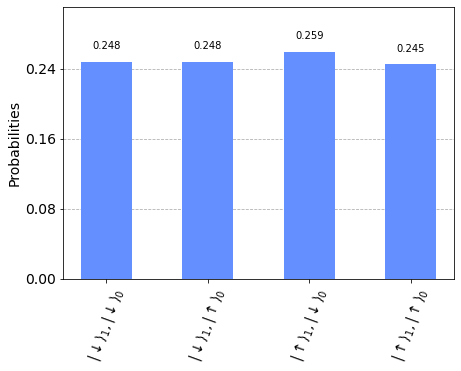

In [16]:
plot_histogram(device_countsAB)

In [17]:
device_countsAB

{'$|\\uparrow\\rangle_1, |\\uparrow\\rangle_0$': 251,
 '$|\\uparrow\\rangle_1, |\\downarrow\\rangle_0$': 265,
 '$|\\downarrow\\rangle_1, |\\uparrow\\rangle_0$': 254,
 '$|\\downarrow\\rangle_1, |\\downarrow\\rangle_0$': 254}

**How to read the results:** The measurement $|\uparrow\rangle_1, |\downarrow\rangle_0$ means that we measured $-1$ (which is the spin up state $|\downarrow\rangle$) for particle 0 along $\mathbf{a}$, while we measrued $1$ (which is the spin up state $|\uparrow\rangle$) for particle 1 measured along $\mathbf{b}$. Hence $P(\mathbf{a},\mathbf{b}) = -1$ for such a measurement. We find the average value of $P(\mathbf{a},\mathbf{b})$ by taking a weighted average over the product of the measurements. This means for this situation we have: 

\begin{equation}
S^{(0)}_\mathbf{a}|\downarrow\rangle_0 = -\frac{\hbar}{2}|\uparrow\rangle_0 \hspace{0.5cm}(positive \: measurement).\\
S^{(1)}_\mathbf{b}|\uparrow\rangle_1 = \frac{\hbar}{2}|\uparrow\rangle_1 \hspace{0.5cm}(negative \: measurement).\\
\Rightarrow product = -1 \cdot (+1) = -1
\end{equation}

(See page 449 in Griffiths and Schroeter for clarification) 

**Exercise 3:** How would the eigenvalue equations be for the outcome $|\uparrow\rangle_1, |\uparrow\rangle_0$ look? What about the $product$ for this state?

**Exercise 4:** Determine the average value $P(\mathbf{a},\mathbf{b})$ of the product from the experiment above, and compare to the qauntum mechanical prediction of $P(\mathbf{a},\mathbf{b}) = -\mathbf{a}\cdot \mathbf{b} = -\cos(\theta_A - \theta_B)$

We now repeat these same steps for $P(\mathbf{b},\mathbf{c})$ and $P(\mathbf{a},\mathbf{c})$.

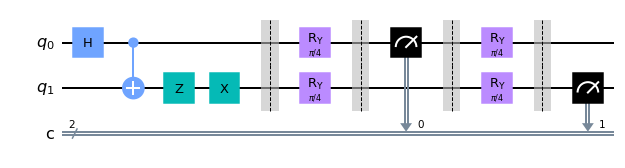

In [8]:
circCB = QuantumCircuit(2,2)
circCB.h(0)
circCB.cx(0,1)
circCB.z(1)
circCB.x(1)
circCB.barrier()
theta1 = thetaC
circCB.ry(theta1,0)
circCB.ry(theta1,1)
circCB.barrier() # just a vertical line which seperates where we set up the state and where we measure. 
circCB.measure(0,0)
circCB.barrier() 
theta2 = thetaB-thetaC
circCB.ry(theta2,0)
circCB.ry(theta2,1)
circCB.barrier() 
circCB.measure(1,1)
circCB.draw()

In [22]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = 1024
    resultCB = simulator.run(circCB, shots=Nmeasure).result()
    device_countsCB = resultCB.get_counts()
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circCB, backend, optimization_level=3)
    qobj = assemble(transpiled_circ, shots=shots)
    jobCB = backend.run(qobj)
    job_monitor(jobCB, interval=2)
    device_countsCB = jobCB.result().get_counts()
    
device_countsCB[r"$|\uparrow\rangle_1, |\uparrow\rangle_0$"] = device_countsCB.pop("11")
device_countsCB[r"$|\uparrow\rangle_1, |\downarrow\rangle_0$"] = device_countsCB.pop("10")
device_countsCB[r"$|\downarrow\rangle_1, |\uparrow\rangle_0$"] = device_countsCB.pop("01")
device_countsCB[r"$|\downarrow\rangle_1, |\downarrow\rangle_0$"] = device_countsCB.pop("00")

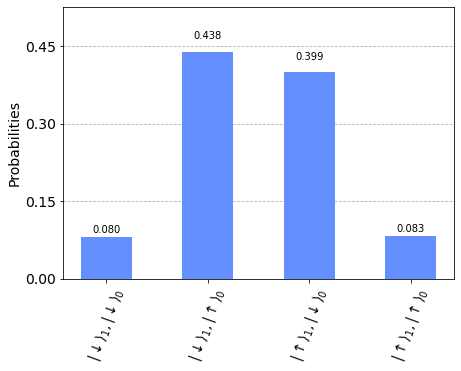

In [23]:
plot_histogram(device_countsCB)

In [24]:
device_countsCB

{'$|\\uparrow\\rangle_1, |\\uparrow\\rangle_0$': 85,
 '$|\\uparrow\\rangle_1, |\\downarrow\\rangle_0$': 409,
 '$|\\downarrow\\rangle_1, |\\uparrow\\rangle_0$': 448,
 '$|\\downarrow\\rangle_1, |\\downarrow\\rangle_0$': 82}

**Exercise 3:** Compute $P(\mathbf{b},\mathbf{c})$ from these results.

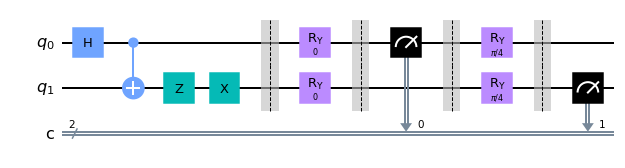

In [25]:
circAC = QuantumCircuit(2,2)
circAC.h(0)
circAC.cx(0,1)
circAC.z(1)
circAC.x(1)
circAC.barrier()
theta1 = thetaA
circAC.ry(theta1,0)
circAC.ry(theta1,1)
circAC.barrier() # just a vertical line which seperates where we set up the state and where we measure. 
circAC.measure(0,0)
circAC.barrier() 
theta2 = thetaC-thetaA
circAC.ry(theta2,0)
circAC.ry(theta2,1)
circAC.barrier() 
circAC.measure(1,1)
circAC.draw()

In [26]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = 1024
    resultAC = simulator.run(circAC, shots=Nmeasure).result()
    device_countsAC = resultAC.get_counts()
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circAC, backend, optimization_level=3)
    qobj = assemble(transpiled_circ, shots=shots)
    jobAC = backend.run(qobj)
    job_monitor(jobAC, interval=2)
    device_countsAC = jobAC.result().get_counts()
    
device_countsAC[r"$|\uparrow\rangle_1, |\uparrow\rangle_0$"] = device_countsAC.pop("11")
device_countsAC[r"$|\uparrow\rangle_1, |\downarrow\rangle_0$"] = device_countsAC.pop("10")
device_countsAC[r"$|\downarrow\rangle_1, |\uparrow\rangle_0$"] = device_countsAC.pop("01")
device_countsAC[r"$|\downarrow\rangle_1, |\downarrow\rangle_0$"] = device_countsAC.pop("00")

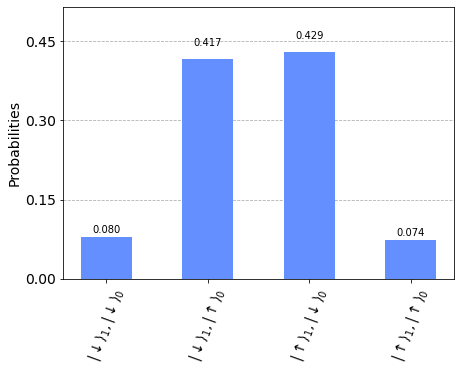

In [27]:
plot_histogram(device_countsAC)

In [28]:
device_countsAC

{'$|\\uparrow\\rangle_1, |\\uparrow\\rangle_0$': 76,
 '$|\\uparrow\\rangle_1, |\\downarrow\\rangle_0$': 439,
 '$|\\downarrow\\rangle_1, |\\uparrow\\rangle_0$': 427,
 '$|\\downarrow\\rangle_1, |\\downarrow\\rangle_0$': 82}

**Exercise 4:** Compute $P(\mathbf{a},\mathbf{c})$ from these results.

**Exercise 5:** Plug your results into Bell's inequality and check for violation - you can compare your results to the ones determined by the code below. Remember that Bell's inequality is given by

$$|P(\mathbf{a},\mathbf{b})-P(\mathbf{a},\mathbf{c})| \leq 1 + P (\mathbf{b},\mathbf{c})$$

In [31]:
def product_av(experiment):
    prod = experiment['$|\\uparrow\\rangle_1, |\\uparrow\\rangle_0$'] + experiment['$|\\downarrow\\rangle_1, |\\downarrow\\rangle_0$'] - experiment['$|\\downarrow\\rangle_1, |\\uparrow\\rangle_0$'] - experiment['$|\\uparrow\\rangle_1, |\\downarrow\\rangle_0$']
    if sim:
        return prod/Nmeasure
    else:
        return prod/shots

In [32]:
print("Violation of Bell inequality: ",np.abs(product_av(device_countsAB)-product_av(device_countsAC)),"<",1+product_av(device_countsCB))

Violation of Bell inequality:  0.03515625 < 0.326171875


Incredible! We have verified through a real quantum experiment that Bell's inequality is violated - as a consequence, we have shown that qunatum mechanics is incompatible with any theory of hidden variables. This means that there does not exist any variable, that determines the outcome of a measement prior to measurement: we simply cannot know the state of the partcle before we go and measure: but measureing is an action that changes the state of the particles by a collapses our wave equation. So quantum mechanics and all its mysterious principles are here to stay!

**Is Bell's inequality violated for all angles?** If you are curious, below is a plot showing which angles between $\mathbf{a}$ and $\mathbf{c}$ violate Bell's inequality, assuming that $\mathbf{a}$ and $\mathbf{b}$ are orthogonal and all vectors are coplanar.

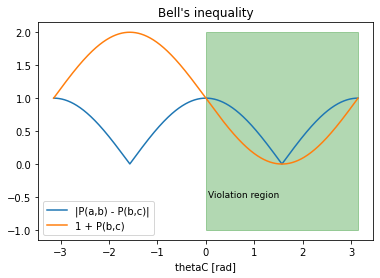

In [10]:
N = 1000

thetaB = np.pi/2
thetaC_arr = np.linspace(-1,1,N)*np.pi

shade_top = 2*np.ones(N)
shade_bottom = -0.5*shade_top

lhs = np.abs(-np.cos(-1*thetaB) + np.cos(-1*thetaC_arr))
rhs = 1 - np.cos(thetaB - thetaC_arr)

violation = lhs > rhs

plt.figure(facecolor = 'white')
plt.plot(thetaC_arr, lhs, label = r"|P(a,b) - P(b,c)|")
plt.plot(thetaC_arr, rhs, label = "1 + P(b,c)")
plt.xlabel("thetaC [rad]")
plt.legend(loc = 'lower left')
plt.fill_between(thetaC_arr[violation],shade_top[violation], y2=shade_bottom[violation], alpha=0.3, color = 'green')
plt.text(0.05,-0.5,"Violation region", size = 9)
plt.title("Bell's inequality")
plt.savefig("Bell.png")

Feel free to change the angles at the top of the exercises to see of this is true! 
